In [ ]:
!pip install tensorflow

In [2]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
CLASSES = 10

In [5]:
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

In [6]:
y_train = to_categorical(y_train, CLASSES)
y_test  = to_categorical(y_test, CLASSES)

In [83]:
from keras.layers.normalization.batch_normalization import BatchNormalization
from keras.layers import Input, Flatten, Dense, Conv2D, Dropout
from keras.layers.activation.leaky_relu import LeakyReLU
from keras.layers.core.activation import Activation
from keras.models import Model

input = Input(shape=(32, 32, 3))

x = Conv2D(filters = 32, strides = 1, kernel_size=3, padding = 'same')(input)
x = LeakyReLU()(x)
x = BatchNormalization()(x)

x = Conv2D(filters = 32, strides = 2, kernel_size=3, padding = 'same')(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)

x = Conv2D(filters = 64, strides = 1, kernel_size=3, padding = 'same')(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)

x = Conv2D(filters = 64, strides = 2, kernel_size=3, padding = 'same')(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Dropout(rate=0.25)(x)

x = Dense(CLASSES)(x)
output = Activation('softmax')(x)

model = Model(input, output)

In [90]:
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_57 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu_71 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_71 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_58 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 leaky_re_lu_72 (LeakyReLU)  (None, 16, 16, 32)        0         
                                                          

In [84]:
from keras.optimizers.optimizer_v2.adam import Adam

optimizer = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size = 32, epochs = 10, shuffle = True)

In [ ]:
model.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step


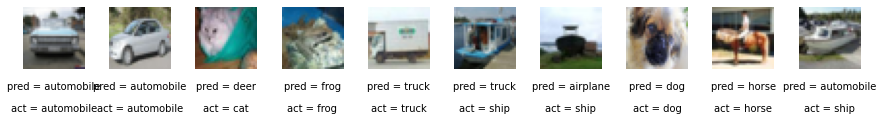

In [89]:
import matplotlib.pyplot as plt

CLASSES_REPR = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog' , 'frog', 'horse' , 'ship', 'truck' ]) 

preds = model.predict(x_test)
preds = CLASSES_REPR[np.argmax(preds, axis=-1)]
actual = CLASSES_REPR[np.argmax(y_test, axis=-1)]

RANDOM = 10
indices = np.random.choice(range(len(x_test)), RANDOM)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1, RANDOM, i + 1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(preds[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' + str(actual[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.imshow(img)
